# Zee5_project

### Zee Recommender Systems

Create a Recommender System to show personalized movie recommendations based on 
ratings given by a user and other users similar to them in order to improve user 
experience

# Import libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# import data

# Movies Data 

In [6]:
movies=pd.read_csv('zee-movies.dat', encoding='ISO-8859-1',delimiter='::')

movies.rename(columns={'Movie ID':'MovieID'},inplace=True)
movies

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


* • Titles are identical to titles provided by the IMDB (including year of release)
* • Genres are pipe-separated and are selected from the following genres:

        o Action
        o Adventure
        o Animation
        o Children's
        o Comedy
        o Crime
        o Documentary
        o Drama
        o Fantasy
        o Film-Noir
        o Horror
        o Musical
        o Mystery
        o Romance
        o Sci-Fi
        o Thriller
        o War
        o Western

# Rating Data 

In [7]:
rating=pd.read_csv('zee-ratings.dat', encoding='ISO-8859-1',delimiter='::')
rating

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


*  UserIDs range between 1 and 6040
*  MovieIDs range between 1 and 3952
*  Ratings are made on a 5-star scale (whole-star ratings only)
*  Timestamp is represented in seconds
*  Each user has at least 20 ratings

# Users Data 

In [8]:
users=pd.read_csv('zee-users.dat', encoding='ISO-8859-1',delimiter='::')
users

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


* Gender is denoted by a "M" for male and "F" for female
*  Age is chosen from the following ranges:

        o 1: "Under 18"
        o 18: "18-24"
        o 25: "25-34"
        o 35: "35-44"
        o 45: "45-49"
        o 50: "50-55"
        o 56: "56+"
*  Occupation is chosen from the following choices:

        o 0: "other" or not specified
        o 1: "academic/educator"
        o 2: "artist"
        o 3: "clerical/admin"
        o 4: "college/grad student"
        o 5: "customer service"
        o 6: "doctor/health care"
        o 7: "executive/managerial"
        o 8: "farmer"
        o 9: "homemaker"
        o 10: "K-12 student"
        o 11: "lawyer"
        o 12: "programmer"
        o 13: "retired"
        o 14: "sales/marketing"
        o 15: "scientist"
        o 16: "self-employed"
        o 17: "technician/engineer"
        o 18: "tradesman/craftsman"
        o 19: "unemployed"
        o 20: "writer"

# Data Analysis

In [9]:
print('movies=',movies.shape)
print('users=',users.shape)
print('rating=',rating.shape)

movies= (3883, 3)
users= (6040, 5)
rating= (1000209, 4)


In [10]:
movies.dtypes

MovieID     int64
Title      object
Genres     object
dtype: object

In [11]:
users.dtypes

UserID         int64
Gender        object
Age            int64
Occupation     int64
Zip-code      object
dtype: object

In [12]:
rating.dtypes

UserID       int64
MovieID      int64
Rating       int64
Timestamp    int64
dtype: object

In [13]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   MovieID  3883 non-null   int64 
 1   Title    3883 non-null   object
 2   Genres   3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [14]:
movies.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
MovieID,3883.0,NaN,NaN,NaN,1986.049446,1146.778349,1.0,982.5,2010.0,2980.5,3952.0
Title,3883,3883,Toy Story (1995),1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genres,3883,301,Drama,843,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   Zip-code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [16]:
users.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
UserID,6040.0,NaN,NaN,NaN,3020.5,1743.742145,1.0,1510.75,3020.5,4530.25,6040.0
Gender,6040,2,M,4331,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,6040.0,NaN,NaN,NaN,30.639238,12.895962,1.0,25.0,25.0,35.0,56.0
Occupation,6040.0,NaN,NaN,NaN,8.146854,6.329511,0.0,3.0,7.0,14.0,20.0
Zip-code,6040,3439,48104,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   UserID     1000209 non-null  int64
 1   MovieID    1000209 non-null  int64
 2   Rating     1000209 non-null  int64
 3   Timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [18]:
rating.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
UserID,1000209.0,3.024512e+03,1.728413e+03,1.0,1506.0,3070.0,4476.0,6.040000e+03
MovieID,1000209.0,1.865540e+03,1.096041e+03,1.0,1030.0,1835.0,2770.0,3.952000e+03
Rating,1000209.0,3.581564e+00,1.117102e+00,1.0,3.0,4.0,4.0,5.000000e+00
Timestamp,1000209.0,9.722437e+08,1.215256e+07,956703932.0,965302637.0,973018006.0,975220939.0,1.046455e+09


In [19]:
# checking null values

In [20]:
movies.isnull().sum()

MovieID    0
Title      0
Genres     0
dtype: int64

In [21]:
rating.isnull().sum()

UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64

In [22]:
users.isnull().sum()

UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

In [23]:
movies.duplicated().sum()

0

In [24]:
users.duplicated().sum()

0

In [25]:
rating.duplicated().sum()

0

* Data is clean and there is no null and duplicate values

# Movies Data

In [26]:
movies['Relese_year']=movies.Title.str.split('(')
# movies['Relese_year']
movies['Title']=movies['Relese_year'].apply(lambda x: x[0])
movies['Relese_year']=movies['Relese_year'].apply(lambda x: x[1].replace(')',''))
movies

,MovieID,Title,Genres,Relese_year
0,1,Toy Story,Animation|Children's|Comedy,1995
1,2,Jumanji,Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama,1995
4,5,Father of the Bride Part II,Comedy,1995
...,...,...,...,...
3878,3948,Meet the Parents,Comedy,2000
3879,3949,Requiem for a Dream,Drama,2000
3880,3950,Tigerland,Drama,2000
3881,3951,Two Family House,Drama,2000


In [27]:
m1=movies.copy()
m1['Genres']=m1['Genres'].str.split('|')
m1=m1.explode('Genres')
m1

,MovieID,Title,Genres,Relese_year
0,1,Toy Story,Animation,1995
0,1,Toy Story,Children's,1995
0,1,Toy Story,Comedy,1995
1,2,Jumanji,Adventure,1995
1,2,Jumanji,Children's,1995
...,...,...,...,...
3879,3949,Requiem for a Dream,Drama,2000
3880,3950,Tigerland,Drama,2000
3881,3951,Two Family House,Drama,2000
3882,3952,"Contender, The",Drama,2000


In [28]:
m1.describe(include='all')

,MovieID,Title,Genres,Relese_year
count,6408.000000,6408,6408,6408
unique,NaN,3833,18,348
top,NaN,"Jungle Book, The",Drama,1998
freq,NaN,7,1603,529
mean,1949.873283,NaN,NaN,NaN
std,1136.449312,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN
25%,977.750000,NaN,NaN,NaN
50%,1962.500000,NaN,NaN,NaN
75%,2911.250000,NaN,NaN,NaN


In [29]:
m1['Relese_year'].value_counts().sort_values()

El Amor Brujo                     1
Anatomie                          1
a.k.a. It's the Rage              1
La Femme Nikita                   1
Et Dieu&#8230;Créa la Femme       1
                               ... 
1999                            404
1997                            510
1996                            513
1995                            519
1998                            529
Name: Relese_year, Length: 348, dtype: int64

In [30]:
m=m1.copy()

In [31]:
for i in m.columns:
    print(i,':',m[i].nunique())

MovieID : 3883
Title : 3833
Genres : 18
Relese_year : 348


In [32]:
mov=movies.copy()

In [33]:
# m1['Relese_year']=m1['Relese_year'].astype('int')
bins=['1919','1929','1939','1949','1959','1969','1979','1989','2000']
labels=['20s','30s','40s','50s','60s','70s','80s','90s']
mov['decade']=pd.cut(mov['Relese_year'],bins=bins,labels=labels)
mov

,MovieID,Title,Genres,Relese_year,decade
0,1,Toy Story,Animation|Children's|Comedy,1995,90s
1,2,Jumanji,Adventure|Children's|Fantasy,1995,90s
2,3,Grumpier Old Men,Comedy|Romance,1995,90s
3,4,Waiting to Exhale,Comedy|Drama,1995,90s
4,5,Father of the Bride Part II,Comedy,1995,90s
...,...,...,...,...,...
3878,3948,Meet the Parents,Comedy,2000,90s
3879,3949,Requiem for a Dream,Drama,2000,90s
3880,3950,Tigerland,Drama,2000,90s
3881,3951,Two Family House,Drama,2000,90s


In [34]:
mov['Relese_year'].value_counts()

1996                         327
1995                         321
1998                         305
1997                         298
1999                         265
                            ... 
Cristo proibito, Il            1
J'ai pas sommeil               1
Voleurs, Les                   1
Kavkazsky Plennik              1
In Weiter Ferne, So Nah!       1
Name: Relese_year, Length: 348, dtype: int64

# Rating data

In [35]:

rating['hour']=rating['Timestamp'].apply(lambda x: datetime.fromtimestamp(x).hour)
rating

,UserID,MovieID,Rating,Timestamp,hour
0,1,1193,5,978300760,3
1,1,661,3,978302109,4
2,1,914,3,978301968,4
3,1,3408,4,978300275,3
4,1,2355,5,978824291,5
...,...,...,...,...,...
1000204,6040,1091,1,956716541,8
1000205,6040,1094,5,956704887,4
1000206,6040,562,5,956704746,4
1000207,6040,1096,4,956715648,7


In [36]:
 r=rating.copy()

In [37]:
r.hour.unique()

array([ 3,  4,  5,  2,  1, 11, 12,  9, 10,  7,  8,  6,  0, 23, 22, 20, 16,
       14, 19, 21, 13, 15, 18, 17], dtype=int64)

In [33]:
r.columns

Index(['UserID', 'MovieID', 'Rating', 'Timestamp', 'hour'], dtype='object')

# Users data

In [34]:
u1=users.copy()
u1

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [35]:
u1['Age'].replace({1: "Under 18"
 , 18: "18-24"
 , 25: "25-34"
 , 35: "35-44"
 , 45: "45-49"
 , 50: "50-55"
 , 56: "56+"},inplace=True)

In [36]:
u1['Occupation'].replace({0: '"other" or not specified'
 , 1: "academic/educator"
 , 2: "artist"
 , 3: "clerical/admin"
 , 4: "college/grad student"
 , 5: "customer service"
 , 6: "doctor/health care"
 , 7: "executive/managerial"
 , 8: "farmer"
 , 9: "homemaker"
 , 10: "K-12 student"
 , 11: "lawyer"
 , 12: "programmer"
 , 13: "retired"
 , 14: "sales/marketing"
 , 15: "scientist"
 , 16: "self-employed"
 , 17: "technician/engineer"
 , 18: "tradesman/craftsman"
 , 19: "unemployed"
 , 20: "writer"},inplace=True)

In [37]:
u=u1.copy()

In [38]:
u1=pd.get_dummies(u1,columns=['Gender','Occupation','Age'])

In [39]:
u1

,UserID,Zip-code,Gender_F,Gender_M,"Occupation_""other"" or not specified",Occupation_K-12 student,Occupation_academic/educator,Occupation_artist,Occupation_clerical/admin,Occupation_college/grad student,...,Occupation_tradesman/craftsman,Occupation_unemployed,Occupation_writer,Age_18-24,Age_25-34,Age_35-44,Age_45-49,Age_50-55,Age_56+,Age_Under 18
0,1,48067,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,70072,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,55117,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,4,02460,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,5,55455,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6035,6036,32603,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6036,6037,76006,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6037,6038,14706,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6038,6039,01060,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [40]:
m

,MovieID,Title,Genres,Relese_year
0,1,Toy Story,Animation,1995
0,1,Toy Story,Children's,1995
0,1,Toy Story,Comedy,1995
1,2,Jumanji,Adventure,1995
1,2,Jumanji,Children's,1995
...,...,...,...,...
3879,3949,Requiem for a Dream,Drama,2000
3880,3950,Tigerland,Drama,2000
3881,3951,Two Family House,Drama,2000
3882,3952,"Contender, The",Drama,2000


# EDA

In [41]:
# u=users.copy()

In [42]:
m_r=m.merge(r,on='MovieID',how='right')
m_r_u=m_r.merge(u,on='UserID',how='left')
m_r_u

,MovieID,Title,Genres,Relese_year,UserID,Rating,Timestamp,hour,Gender,Age,Occupation,Zip-code
0,1193,One Flew Over the Cuckoo's Nest,Drama,1975,1,5,978300760,3,F,Under 18,K-12 student,48067
1,661,James and the Giant Peach,Animation,1996,1,3,978302109,4,F,Under 18,K-12 student,48067
2,661,James and the Giant Peach,Children's,1996,1,3,978302109,4,F,Under 18,K-12 student,48067
3,661,James and the Giant Peach,Musical,1996,1,3,978302109,4,F,Under 18,K-12 student,48067
4,914,My Fair Lady,Musical,1964,1,3,978301968,4,F,Under 18,K-12 student,48067
...,...,...,...,...,...,...,...,...,...,...,...,...
2101810,1096,Sophie's Choice,Drama,1982,6040,4,956715648,7,M,25-34,doctor/health care,11106
2101811,1097,E.T. the Extra-Terrestrial,Children's,1982,6040,4,956715569,7,M,25-34,doctor/health care,11106
2101812,1097,E.T. the Extra-Terrestrial,Drama,1982,6040,4,956715569,7,M,25-34,doctor/health care,11106
2101813,1097,E.T. the Extra-Terrestrial,Fantasy,1982,6040,4,956715569,7,M,25-34,doctor/health care,11106


In [43]:
m_r_u.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2101815 entries, 0 to 2101814
Data columns (total 12 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   MovieID      int64 
 1   Title        object
 2   Genres       object
 3   Relese_year  object
 4   UserID       int64 
 5   Rating       int64 
 6   Timestamp    int64 
 7   hour         int64 
 8   Gender       object
 9   Age          object
 10  Occupation   object
 11  Zip-code     object
dtypes: int64(5), object(7)
memory usage: 208.5+ MB


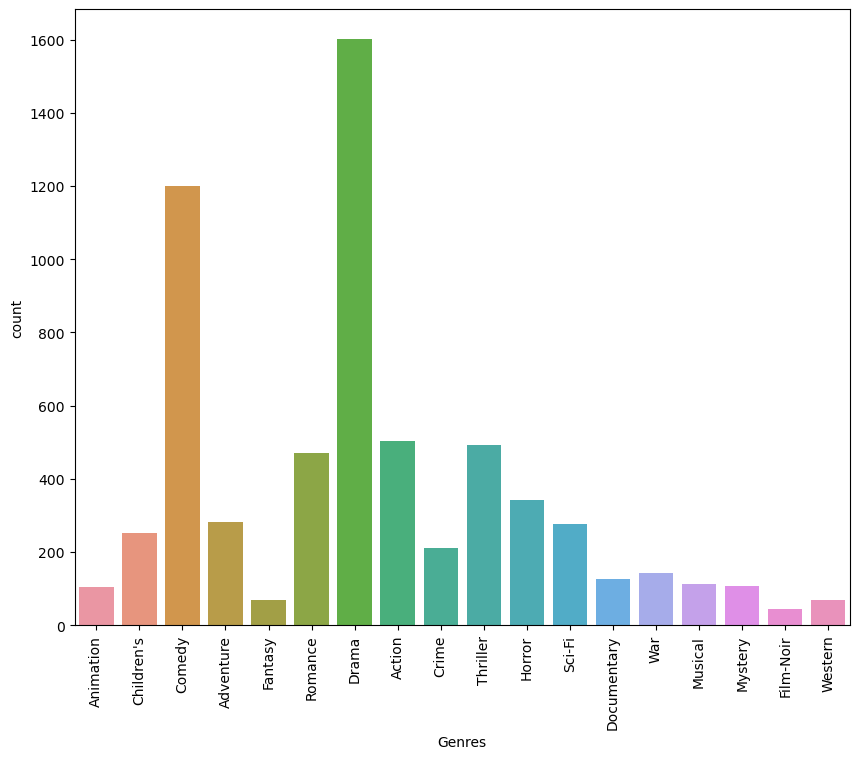

In [44]:
plt.figure(figsize=(10,8))
sns.countplot(x=m['Genres'])
plt.xticks(rotation=90)
plt.show()

In [178]:
m1['Genres'].value_counts().sort_values(ascending=False)

Drama          1603
Comedy         1200
Action          503
Thriller        492
Romance         471
Horror          343
Adventure       283
Sci-Fi          276
Children's      251
Crime           211
War             143
Documentary     127
Musical         114
Mystery         106
Animation       105
Fantasy          68
Western          68
Film-Noir        44
Name: Genres, dtype: int64

* Compairing to other genres drama types are released more often and then comedy type movies
* Film-Noir is the least released
* Drama : 1603
* Comedy : 1200

In [45]:
m['Title'].value_counts()

Jungle Book, The                 7
Mummy, The                       7
Mighty Joe Young                 6
Godzilla                         6
Transformers: The Movie, The     6
                                ..
Mass Appeal                      1
Hedd Wyn                         1
Rushmore                         1
Collectionneuse, La              1
Eyes Wide Shut                   1
Name: Title, Length: 3833, dtype: int64

In [46]:
movies['Title'].nunique()

3833

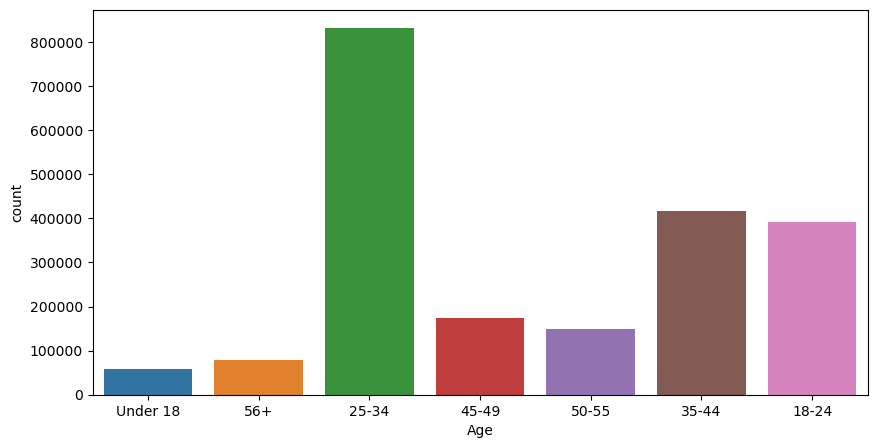

In [181]:
plt.figure(figsize=(10,5))
sns.countplot(x=m_r_u['Age'],data=m_r_u)
plt.show()

* 25-34 age group have watched and rated the most number of movies
* people have age under 18 watched and rated less number of movies

## Most of the users in our dataset who’ve rated the movies are Male. (T/F)

In [48]:
def plot_cat(feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    if m_r_u[feature].nunique() == 2 :
        a=m_r_u[feature].value_counts()[0]
        b=m_r_u[feature].value_counts()[1]
        c=m_r_u[feature].value_counts().index
        ax=plt.pie(x=[a,b],labels=c,autopct='%1.2f%%',shadow=True,explode=(0,0.05))  
    plt.subplot(1,2,2)
    ax=sns.countplot(x=m_r_u[feature],hue=m_r_u.Rating)
    plt.xticks(rotation=90)


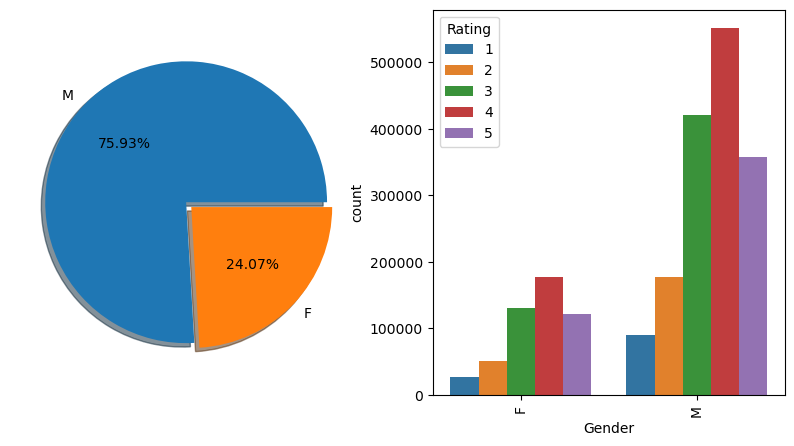

In [49]:
plot_cat('Gender')

* From this data we can say  75.93% of the users in our dataset who’ve rated the movies are Male
* 24.07% of the users in our dataset who’ve rated the movies are female

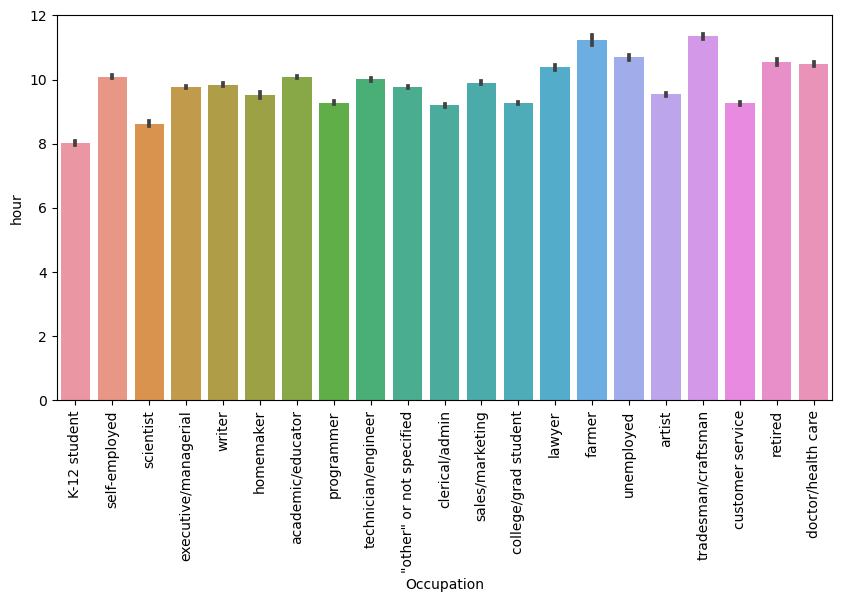

In [50]:
plt.figure(figsize=(10,5))
sns.barplot(x='Occupation',y='hour',data=m_r_u)
plt.xticks(rotation=90)
plt.show()

* People who have worked in tradesman/craftsman and farmer watched and spend more hours

In [51]:
def plot_num(feature):
    plt.figure(figsize=(10,8))
    plt.subplot(2,1,1)
    sns.boxplot(y=m_r_u[feature],x=m_r_u['Rating'])
    plt.subplot(2,1,2)
    sns.histplot(x=m_r_u[feature],kde=True)
    plt.xticks(rotation=90)
    

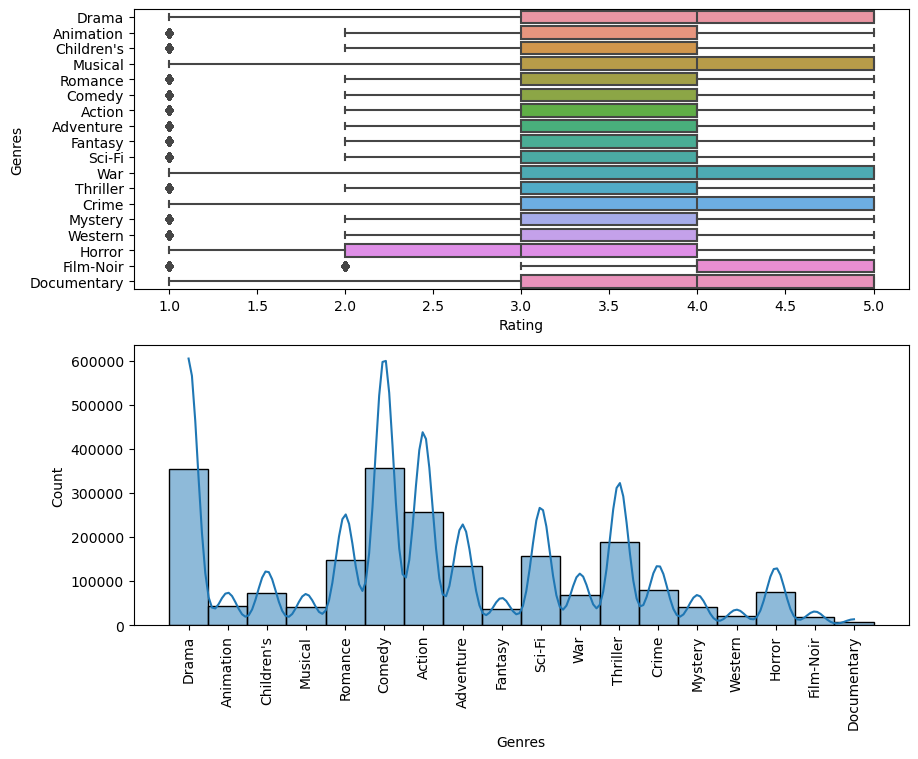

In [52]:
plot_num('Genres')

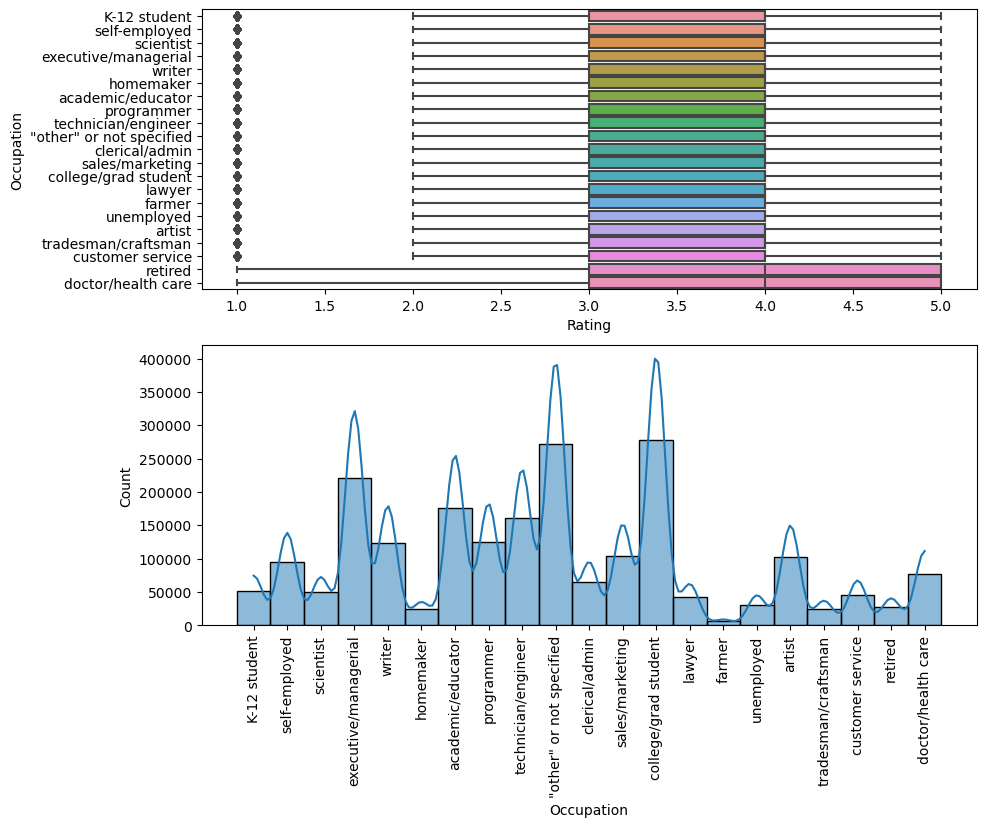

In [54]:
plot_num('Occupation')

* Most of the users in our dataset who’ve watched the movies are college/gradestudent
* People who have worked as farmer watched less

In [55]:
def plot_num(feature):
    plt.figure(figsize=(10,8))
    plt.subplot(2,1,1)
    sns.boxplot(y=m_r_u[feature],x=m_r_u['hour'])
    plt.subplot(2,1,2)
    sns.histplot(x=m_r_u[feature],kde=True)
    plt.xticks(rotation=90)
    

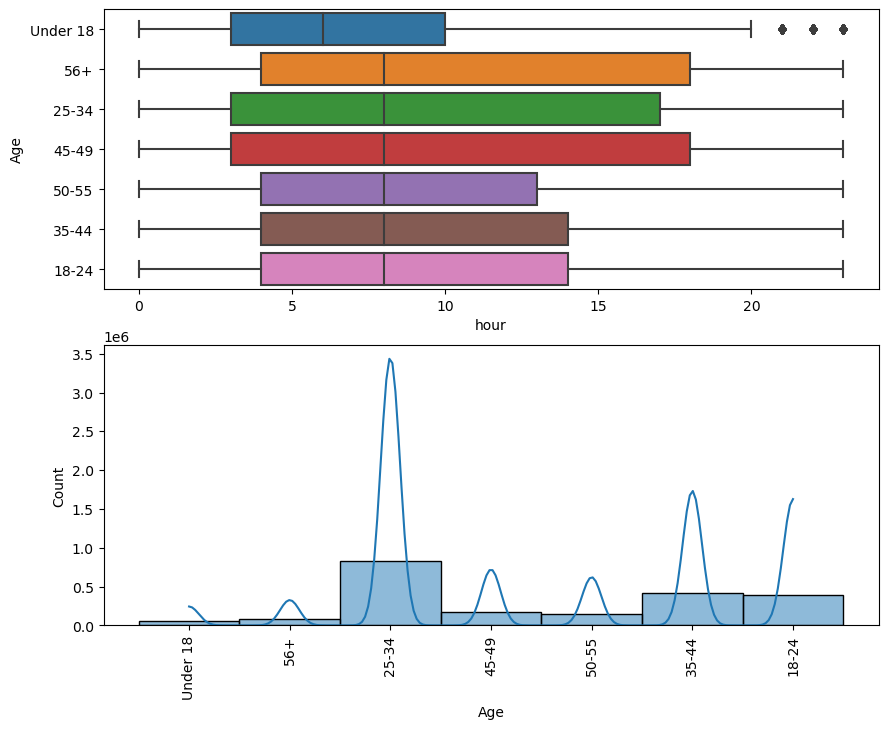

In [56]:
plot_num('Age')

* 25-34 age group spend more hours in watching 

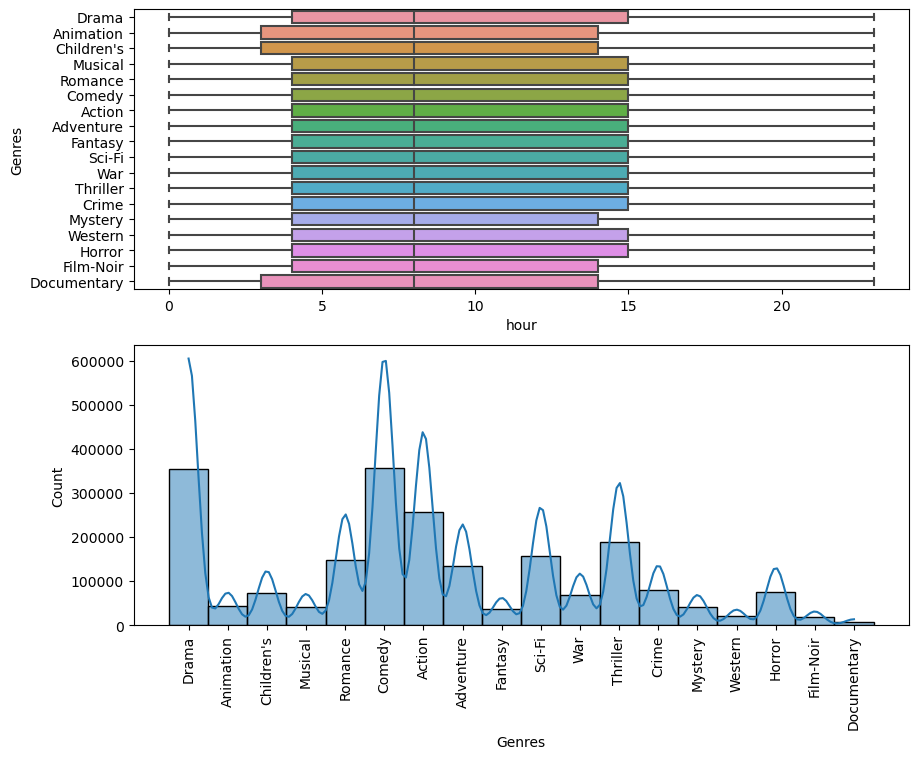

In [57]:
plot_num('Genres')

## Users of which age group have watched and rated the most number of movies?

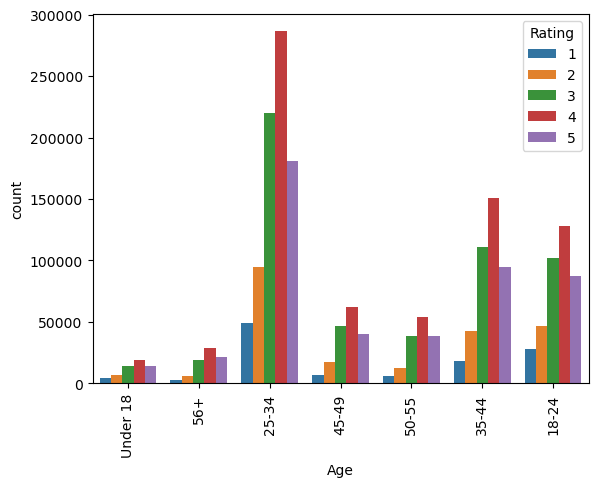

In [58]:
sns.countplot(x=m_r_u['Age'],hue=m_r_u.Rating)
plt.xticks(rotation=90)
plt.show()

* 25-34 age group have watched and rated the most number of movies
* people have age under 18 watched and rated less number of movies

## Users belonging to which profession have watched and rated the most movies?

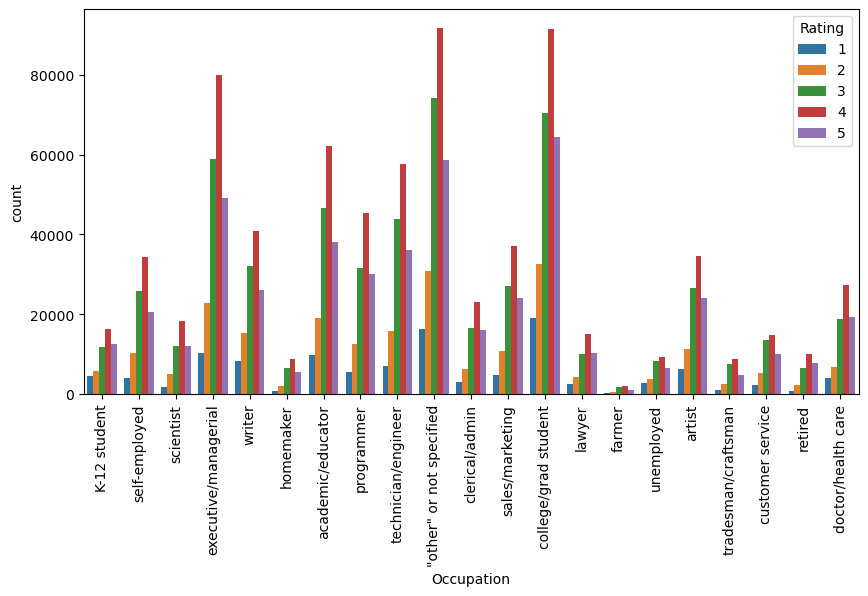

In [59]:
plt.figure(figsize=(10,5))
sns.countplot(x=m_r_u['Occupation'],hue=m_r_u.Rating)
plt.xticks(rotation=90)
plt.show()

In [185]:
u['Occupation'].value_counts()

college/grad student        759
"other" or not specified    711
executive/managerial        679
academic/educator           528
technician/engineer         502
programmer                  388
sales/marketing             302
writer                      281
artist                      267
self-employed               241
doctor/health care          236
K-12 student                195
clerical/admin              173
scientist                   144
retired                     142
lawyer                      129
customer service            112
homemaker                    92
unemployed                   72
tradesman/craftsman          70
farmer                       17
Name: Occupation, dtype: int64

* Most of the users in our dataset who’ve watched the movies are college/gradestudent
* People who have worked as farmer watched less

##  Most of the movies present in our dataset were released in which decade? 

In [60]:
mov=movies.copy()
# m1['Relese_year']=m1['Relese_year'].astype('int')
bins=['1919','1929','1939','1949','1959','1969','1979','1989','2000']
labels=['20s','30s','40s','50s','60s','70s','80s','90s']
mov['Decade']=pd.cut(mov['Relese_year'],bins=bins,labels=labels)
mov


,MovieID,Title,Genres,Relese_year,Decade
0,1,Toy Story,Animation|Children's|Comedy,1995,90s
1,2,Jumanji,Adventure|Children's|Fantasy,1995,90s
2,3,Grumpier Old Men,Comedy|Romance,1995,90s
3,4,Waiting to Exhale,Comedy|Drama,1995,90s
4,5,Father of the Bride Part II,Comedy,1995,90s
...,...,...,...,...,...
3878,3948,Meet the Parents,Comedy,2000,90s
3879,3949,Requiem for a Dream,Drama,2000,90s
3880,3950,Tigerland,Drama,2000,90s
3881,3951,Two Family House,Drama,2000,90s


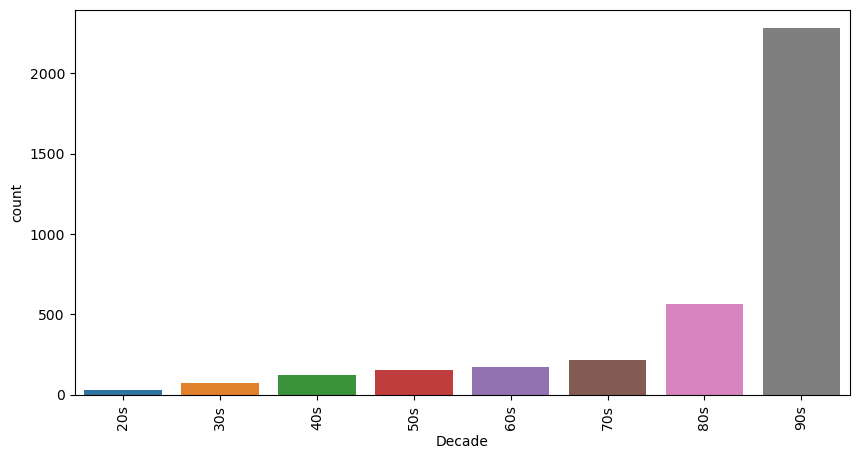

In [61]:
plt.figure(figsize=(10,5))
sns.countplot(x=mov['Decade'])
plt.xticks(rotation=90)
plt.show()

In [62]:
m_v=mov.merge(r,on='MovieID',how='right')
m_v

,MovieID,Title,Genres,Relese_year,Decade,UserID,Rating,Timestamp,hour
0,1193,One Flew Over the Cuckoo's Nest,Drama,1975,70s,1,5,978300760,3
1,661,James and the Giant Peach,Animation|Children's|Musical,1996,90s,1,3,978302109,4
2,914,My Fair Lady,Musical|Romance,1964,60s,1,3,978301968,4
3,3408,Erin Brockovich,Drama,2000,90s,1,4,978300275,3
4,2355,"Bug's Life, A",Animation|Children's|Comedy,1998,90s,1,5,978824291,5
...,...,...,...,...,...,...,...,...,...
1000204,1091,Weekend at Bernie's,Comedy,1989,80s,6040,1,956716541,8
1000205,1094,"Crying Game, The",Drama|Romance|War,1992,90s,6040,5,956704887,4
1000206,562,Welcome to the Dollhouse,Comedy|Drama,1995,90s,6040,5,956704746,4
1000207,1096,Sophie's Choice,Drama,1982,80s,6040,4,956715648,7


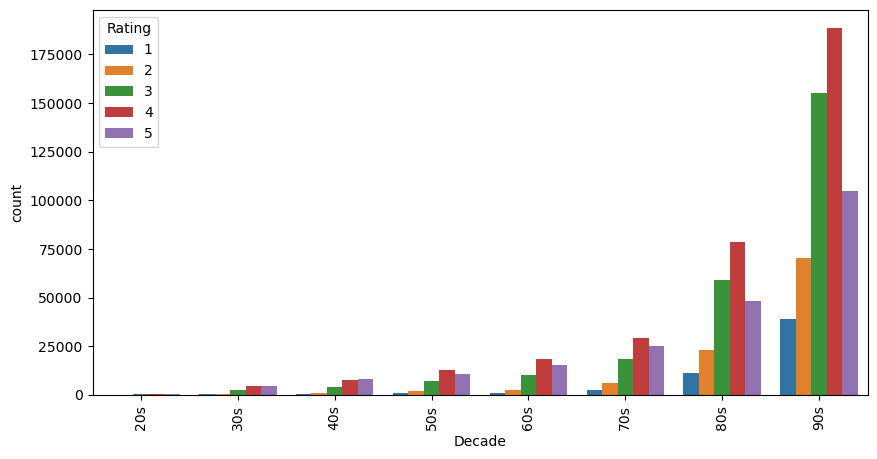

In [63]:
plt.figure(figsize=(10,5))
sns.countplot(x=m_v['Decade'],hue=m_v.Rating)
plt.xticks(rotation=90)
plt.show()

* Most of the movies present in our dataset were released in 90s
* Passing each decades we can see the growth of movie release 

# Build a Recommender System based on Pearson Correlation

@ Model building

### movie data

In [65]:
m

,MovieID,Title,Genres,Relese_year
0,1,Toy Story,Animation,1995
0,1,Toy Story,Children's,1995
0,1,Toy Story,Comedy,1995
1,2,Jumanji,Adventure,1995
1,2,Jumanji,Children's,1995
...,...,...,...,...
3879,3949,Requiem for a Dream,Drama,2000
3880,3950,Tigerland,Drama,2000
3881,3951,Two Family House,Drama,2000
3882,3952,"Contender, The",Drama,2000


In [66]:
m.columns

Index(['MovieID', 'Title', 'Genres', 'Relese_year'], dtype='object')

In [67]:
m=m.pivot(index='MovieID',columns='Genres',values='Title')
m = ~m.isna()

In [68]:
m = m.astype(int)
m

Genres,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
MovieID,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3949,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3950,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


### rating data

In [69]:
r

,UserID,MovieID,Rating,Timestamp,hour
0,1,1193,5,978300760,3
1,1,661,3,978302109,4
2,1,914,3,978301968,4
3,1,3408,4,978300275,3
4,1,2355,5,978824291,5
...,...,...,...,...,...
1000204,6040,1091,1,956716541,8
1000205,6040,1094,5,956704887,4
1000206,6040,562,5,956704746,4
1000207,6040,1096,4,956715648,7


### users data

In [70]:
u2=u.copy()
u2

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,Under 18,K-12 student,48067
1,2,M,56+,self-employed,70072
2,3,M,25-34,scientist,55117
3,4,M,45-49,executive/managerial,02460
4,5,M,25-34,writer,55455
...,...,...,...,...,...
6035,6036,F,25-34,scientist,32603
6036,6037,F,45-49,academic/educator,76006
6037,6038,F,56+,academic/educator,14706
6038,6039,F,45-49,"""other"" or not specified",01060


In [71]:
u2= u2.merge(r.groupby('UserID').Rating.mean().reset_index(), on='UserID',how='right')


In [72]:
u2

,UserID,Gender,Age,Occupation,Zip-code,Rating
0,1,F,Under 18,K-12 student,48067,4.188679
1,2,M,56+,self-employed,70072,3.713178
2,3,M,25-34,scientist,55117,3.901961
3,4,M,45-49,executive/managerial,02460,4.190476
4,5,M,25-34,writer,55455,3.146465
...,...,...,...,...,...,...
6035,6036,F,25-34,scientist,32603,3.302928
6036,6037,F,45-49,academic/educator,76006,3.717822
6037,6038,F,56+,academic/educator,14706,3.800000
6038,6039,F,45-49,"""other"" or not specified",01060,3.878049


In [73]:
u2 = u2.merge(r.groupby('UserID').hour.mean().reset_index(), on='UserID',how='right')
u2

,UserID,Gender,Age,Occupation,Zip-code,Rating,hour
0,1,F,Under 18,K-12 student,48067,4.188679,3.792453
1,2,M,56+,self-employed,70072,3.713178,2.968992
2,3,M,25-34,scientist,55117,3.901961,2.215686
3,4,M,45-49,executive/managerial,02460,4.190476,1.000000
4,5,M,25-34,writer,55455,3.146465,11.656566
...,...,...,...,...,...,...,...
6035,6036,F,25-34,scientist,32603,3.302928,10.869369
6036,6037,F,45-49,academic/educator,76006,3.717822,7.000000
6037,6038,F,56+,academic/educator,14706,3.800000,5.550000
6038,6039,F,45-49,"""other"" or not specified",01060,3.878049,5.512195


In [74]:
u2.columns=['UserID','Gender','Age','Occupation','Zip-code','Average_Rating','Average_hour']
u2=u2.set_index('UserID')
u2

,Gender,Age,Occupation,Zip-code,Average_Rating,Average_hour
UserID,,,,,,
1,F,Under 18,K-12 student,48067,4.188679,3.792453
2,M,56+,self-employed,70072,3.713178,2.968992
3,M,25-34,scientist,55117,3.901961,2.215686
4,M,45-49,executive/managerial,02460,4.190476,1.000000
5,M,25-34,writer,55455,3.146465,11.656566
...,...,...,...,...,...,...
6036,F,25-34,scientist,32603,3.302928,10.869369
6037,F,45-49,academic/educator,76006,3.717822,7.000000
6038,F,56+,academic/educator,14706,3.800000,5.550000


In [75]:
u2['Zip-code']=u2['Zip-code'].apply(lambda x: x.replace('-',''))

In [76]:
# u.drop('Zip-code',axis=1,inplace=True)
#u=u[~ u['Zip-code'].str.contains('-')]

In [77]:
u2=pd.get_dummies(u2,columns=['Gender','Age','Occupation'])

In [78]:
u2

,Zip-code,Average_Rating,Average_hour,Gender_F,Gender_M,Age_18-24,Age_25-34,Age_35-44,Age_45-49,Age_50-55,...,Occupation_lawyer,Occupation_programmer,Occupation_retired,Occupation_sales/marketing,Occupation_scientist,Occupation_self-employed,Occupation_technician/engineer,Occupation_tradesman/craftsman,Occupation_unemployed,Occupation_writer
UserID,,,,,,,,,,,,,,,,,,,,,
1,48067,4.188679,3.792453,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,70072,3.713178,2.968992,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,55117,3.901961,2.215686,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,02460,4.190476,1.000000,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,55455,3.146465,11.656566,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,32603,3.302928,10.869369,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6037,76006,3.717822,7.000000,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6038,14706,3.800000,5.550000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
u2.isnull().sum()

Zip-code                               0
Average_Rating                         0
Average_hour                           0
Gender_F                               0
Gender_M                               0
Age_18-24                              0
Age_25-34                              0
Age_35-44                              0
Age_45-49                              0
Age_50-55                              0
Age_56+                                0
Age_Under 18                           0
Occupation_"other" or not specified    0
Occupation_K-12 student                0
Occupation_academic/educator           0
Occupation_artist                      0
Occupation_clerical/admin              0
Occupation_college/grad student        0
Occupation_customer service            0
Occupation_doctor/health care          0
Occupation_executive/managerial        0
Occupation_farmer                      0
Occupation_homemaker                   0
Occupation_lawyer                      0
Occupation_progr

In [80]:
scaler = StandardScaler()
u2 = pd.DataFrame(scaler.fit_transform(u2), columns=u2.columns, index=u2.index)
u2.head()

,Zip-code,Average_Rating,Average_hour,Gender_F,Gender_M,Age_18-24,Age_25-34,Age_35-44,Age_45-49,Age_50-55,...,Occupation_lawyer,Occupation_programmer,Occupation_retired,Occupation_sales/marketing,Occupation_scientist,Occupation_self-employed,Occupation_technician/engineer,Occupation_tradesman/craftsman,Occupation_unemployed,Occupation_writer
UserID,,,,,,,,,,,,,,,,,,,,,
1,-0.090248,1.131261,-0.909947,1.591927,-1.591927,-0.472668,-0.728999,-0.496117,-0.316516,-0.299109,...,-0.147729,-0.262008,-0.155164,-0.229416,-0.156280,-0.203860,-0.301075,-0.108283,-0.109838,-0.220892
2,-0.089900,0.024380,-1.037952,-0.628170,0.628170,-0.472668,-0.728999,-0.496117,-0.316516,-0.299109,...,-0.147729,-0.262008,-0.155164,-0.229416,-0.156280,4.905328,-0.301075,-0.108283,-0.109838,-0.220892
3,-0.090136,0.463832,-1.155052,-0.628170,0.628170,-0.472668,1.371743,-0.496117,-0.316516,-0.299109,...,-0.147729,-0.262008,-0.155164,-0.229416,6.398785,-0.203860,-0.301075,-0.108283,-0.109838,-0.220892
4,-0.090970,1.135444,-1.344027,-0.628170,0.628170,-0.472668,-0.728999,-0.496117,3.159402,-0.299109,...,-0.147729,-0.262008,-0.155164,-0.229416,-0.156280,-0.203860,-0.301075,-0.108283,-0.109838,-0.220892
5,-0.090131,-1.294827,0.312509,-0.628170,0.628170,-0.472668,1.371743,-0.496117,-0.316516,-0.299109,...,-0.147729,-0.262008,-0.155164,-0.229416,-0.156280,-0.203860,-0.301075,-0.108283,-0.109838,4.527103


In [81]:
u2.isnull().sum()

Zip-code                               0
Average_Rating                         0
Average_hour                           0
Gender_F                               0
Gender_M                               0
Age_18-24                              0
Age_25-34                              0
Age_35-44                              0
Age_45-49                              0
Age_50-55                              0
Age_56+                                0
Age_Under 18                           0
Occupation_"other" or not specified    0
Occupation_K-12 student                0
Occupation_academic/educator           0
Occupation_artist                      0
Occupation_clerical/admin              0
Occupation_college/grad student        0
Occupation_customer service            0
Occupation_doctor/health care          0
Occupation_executive/managerial        0
Occupation_farmer                      0
Occupation_homemaker                   0
Occupation_lawyer                      0
Occupation_progr

In [82]:
m

Genres,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
MovieID,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3949,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3950,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [83]:
r

,UserID,MovieID,Rating,Timestamp,hour
0,1,1193,5,978300760,3
1,1,661,3,978302109,4
2,1,914,3,978301968,4
3,1,3408,4,978300275,3
4,1,2355,5,978824291,5
...,...,...,...,...,...
1000204,6040,1091,1,956716541,8
1000205,6040,1094,5,956704887,4
1000206,6040,562,5,956704746,4
1000207,6040,1096,4,956715648,7


In [84]:
x=rating[['MovieID','UserID','Rating']].copy()
x

,MovieID,UserID,Rating
0,1193,1,5
1,661,1,3
2,914,1,3
3,3408,1,4
4,2355,1,5
...,...,...,...
1000204,1091,6040,1
1000205,1094,6040,5
1000206,562,6040,5
1000207,1096,6040,4


In [85]:
x = x.merge(u2.reset_index(), on='UserID', how='left')
x

,MovieID,UserID,Rating,Zip-code,Average_Rating,Average_hour,Gender_F,Gender_M,Age_18-24,Age_25-34,...,Occupation_lawyer,Occupation_programmer,Occupation_retired,Occupation_sales/marketing,Occupation_scientist,Occupation_self-employed,Occupation_technician/engineer,Occupation_tradesman/craftsman,Occupation_unemployed,Occupation_writer
0,1193,1,5,-0.090248,1.131261,-0.909947,1.591927,-1.591927,-0.472668,-0.728999,...,-0.147729,-0.262008,-0.155164,-0.229416,-0.15628,-0.20386,-0.301075,-0.108283,-0.109838,-0.220892
1,661,1,3,-0.090248,1.131261,-0.909947,1.591927,-1.591927,-0.472668,-0.728999,...,-0.147729,-0.262008,-0.155164,-0.229416,-0.15628,-0.20386,-0.301075,-0.108283,-0.109838,-0.220892
2,914,1,3,-0.090248,1.131261,-0.909947,1.591927,-1.591927,-0.472668,-0.728999,...,-0.147729,-0.262008,-0.155164,-0.229416,-0.15628,-0.20386,-0.301075,-0.108283,-0.109838,-0.220892
3,3408,1,4,-0.090248,1.131261,-0.909947,1.591927,-1.591927,-0.472668,-0.728999,...,-0.147729,-0.262008,-0.155164,-0.229416,-0.15628,-0.20386,-0.301075,-0.108283,-0.109838,-0.220892
4,2355,1,5,-0.090248,1.131261,-0.909947,1.591927,-1.591927,-0.472668,-0.728999,...,-0.147729,-0.262008,-0.155164,-0.229416,-0.15628,-0.20386,-0.301075,-0.108283,-0.109838,-0.220892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,1091,6040,1,-0.090833,-0.290959,0.183552,-0.628170,0.628170,-0.472668,1.371743,...,-0.147729,-0.262008,-0.155164,-0.229416,-0.15628,-0.20386,-0.301075,-0.108283,-0.109838,-0.220892
1000205,1094,6040,5,-0.090833,-0.290959,0.183552,-0.628170,0.628170,-0.472668,1.371743,...,-0.147729,-0.262008,-0.155164,-0.229416,-0.15628,-0.20386,-0.301075,-0.108283,-0.109838,-0.220892
1000206,562,6040,5,-0.090833,-0.290959,0.183552,-0.628170,0.628170,-0.472668,1.371743,...,-0.147729,-0.262008,-0.155164,-0.229416,-0.15628,-0.20386,-0.301075,-0.108283,-0.109838,-0.220892
1000207,1096,6040,4,-0.090833,-0.290959,0.183552,-0.628170,0.628170,-0.472668,1.371743,...,-0.147729,-0.262008,-0.155164,-0.229416,-0.15628,-0.20386,-0.301075,-0.108283,-0.109838,-0.220892


In [86]:
x = x.merge(m.reset_index(), on='MovieID', how='left')
x

,MovieID,UserID,Rating,Zip-code,Average_Rating,Average_hour,Gender_F,Gender_M,Age_18-24,Age_25-34,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1193,1,5,-0.090248,1.131261,-0.909947,1.591927,-1.591927,-0.472668,-0.728999,...,0,0,0,0,0,0,0,0,0,0
1,661,1,3,-0.090248,1.131261,-0.909947,1.591927,-1.591927,-0.472668,-0.728999,...,0,0,0,1,0,0,0,0,0,0
2,914,1,3,-0.090248,1.131261,-0.909947,1.591927,-1.591927,-0.472668,-0.728999,...,0,0,0,1,0,1,0,0,0,0
3,3408,1,4,-0.090248,1.131261,-0.909947,1.591927,-1.591927,-0.472668,-0.728999,...,0,0,0,0,0,0,0,0,0,0
4,2355,1,5,-0.090248,1.131261,-0.909947,1.591927,-1.591927,-0.472668,-0.728999,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,1091,6040,1,-0.090833,-0.290959,0.183552,-0.628170,0.628170,-0.472668,1.371743,...,0,0,0,0,0,0,0,0,0,0
1000205,1094,6040,5,-0.090833,-0.290959,0.183552,-0.628170,0.628170,-0.472668,1.371743,...,0,0,0,0,0,1,0,0,1,0
1000206,562,6040,5,-0.090833,-0.290959,0.183552,-0.628170,0.628170,-0.472668,1.371743,...,0,0,0,0,0,0,0,0,0,0
1000207,1096,6040,4,-0.090833,-0.290959,0.183552,-0.628170,0.628170,-0.472668,1.371743,...,0,0,0,0,0,0,0,0,0,0


In [87]:
x.columns

Index(['MovieID', 'UserID', 'Rating', 'Zip-code', 'Average_Rating',
       'Average_hour', 'Gender_F', 'Gender_M', 'Age_18-24', 'Age_25-34',
       'Age_35-44', 'Age_45-49', 'Age_50-55', 'Age_56+', 'Age_Under 18',
       'Occupation_"other" or not specified', 'Occupation_K-12 student',
       'Occupation_academic/educator', 'Occupation_artist',
       'Occupation_clerical/admin', 'Occupation_college/grad student',
       'Occupation_customer service', 'Occupation_doctor/health care',
       'Occupation_executive/managerial', 'Occupation_farmer',
       'Occupation_homemaker', 'Occupation_lawyer', 'Occupation_programmer',
       'Occupation_retired', 'Occupation_sales/marketing',
       'Occupation_scientist', 'Occupation_self-employed',
       'Occupation_technician/engineer', 'Occupation_tradesman/craftsman',
       'Occupation_unemployed', 'Occupation_writer', 'Action', 'Adventure',
       'Animation', 'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-N

In [88]:
# x=x.fillna(x[['Age','Occupation','u_avg_rating','Avg_hour','Gender_M','Rating']].mean())

In [89]:
X = x.drop(columns = ['MovieID', 'UserID','Rating','Average_Rating'])


In [90]:
y = x['Rating']

In [91]:
y

0          5
1          3
2          3
3          4
4          5
          ..
1000204    1
1000205    5
1000206    5
1000207    4
1000208    4
Name: Rating, Length: 1000209, dtype: int64

In [92]:
# X.isnull().sum()

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [94]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([3.39365106, 3.37849953, 3.75336391, ..., 3.48746449, 3.66310891,
       3.65632827])

#  Pearson Correlation


* This dataset could be in the form of a user-item matrix, where each row represents a user, each column represents an item, and the values represent the ratings or preferences.

In [95]:
users

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [96]:
m1['UserId']=users['UserID']

In [97]:
m1

,MovieID,Title,Genres,Relese_year,UserId
0,1,Toy Story,Animation,1995,1
0,1,Toy Story,Children's,1995,1
0,1,Toy Story,Comedy,1995,1
1,2,Jumanji,Adventure,1995,2
1,2,Jumanji,Children's,1995,2
...,...,...,...,...,...
3879,3949,Requiem for a Dream,Drama,2000,3880
3880,3950,Tigerland,Drama,2000,3881
3881,3951,Two Family House,Drama,2000,3882
3882,3952,"Contender, The",Drama,2000,3883


In [98]:
pears=m1.pivot(index='UserId',columns='Genres',values='Title')
pears = ~pears.isna()

In [99]:
pears = pears.astype(int)
pears

Genres,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
UserId,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3879,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3880,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3881,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [100]:
user_correlation1 = pears.corr(method='pearson')

user_correlation1

Genres,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
Genres,,,,,,,,,,,,,,,,,,
Action,1.000000,0.269491,-0.045399,-0.060865,-0.150113,0.093605,-0.070936,-0.167691,0.036200,-0.041299,-0.052516,-0.053462,-0.008148,-0.061108,0.212650,0.159700,0.111885,0.006966
Adventure,0.269491,1.000000,0.038770,0.252654,-0.093174,-0.027875,-0.051556,-0.168689,0.226924,-0.020656,-0.059345,0.004058,-0.028730,-0.022236,0.180770,-0.014468,0.008300,-0.007220
Animation,-0.045399,0.038770,1.000000,0.498564,-0.025595,-0.039963,-0.030655,-0.136561,0.050369,-0.002847,-0.046298,0.271978,-0.018185,-0.042487,0.003316,-0.044409,-0.015738,-0.022257
Children's,-0.060865,0.252654,0.498564,1.000000,0.034975,-0.063016,-0.048340,-0.162990,0.268320,-0.028144,-0.078139,0.183839,-0.031185,-0.075216,-0.015655,-0.096986,-0.040282,-0.019128
Comedy,-0.150113,-0.093174,-0.025595,0.034975,1.000000,-0.071807,-0.110443,-0.304940,-0.008560,-0.066332,-0.127654,0.019048,-0.067575,0.099765,-0.117760,-0.202803,-0.077507,-0.017058
Crime,0.093605,-0.027875,-0.039963,-0.063016,-0.071807,1.000000,-0.044079,0.006678,-0.023342,0.135339,-0.050596,-0.041690,0.050476,-0.057744,-0.039781,0.106779,-0.046873,-0.032003
Documentary,-0.070936,-0.051556,-0.030655,-0.048340,-0.110443,-0.044079,1.000000,-0.142420,-0.024550,-0.019686,-0.057238,-0.014826,-0.030805,-0.068320,-0.050865,-0.070042,-0.028268,-0.024550
Drama,-0.167691,-0.168689,-0.136561,-0.162990,-0.304940,0.006678,-0.142420,1.000000,-0.076055,-0.060115,-0.238884,-0.099348,-0.037748,0.015316,-0.185123,-0.146414,0.047120,-0.060104
Fantasy,0.036200,0.226924,0.050369,0.268320,-0.008560,-0.023342,-0.024550,-0.076055,1.000000,-0.014293,-0.041558,0.000042,-0.022366,-0.007507,0.062399,-0.044952,-0.015681,-0.017824


# Collaburative filtering

## User - Item Matrix

In [101]:
r=rating.copy()

In [102]:
ui=r.pivot(index='UserID',columns='MovieID',values='Rating').fillna(0)

In [103]:
ui.head(5)
ui=ui.astype(int)
ui

MovieID,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
UserID,,,,,,,,,,,,,,,,,,,,,
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,0,0,0,2,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6037,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6038,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
# user_correlation = pearson.corr(method='pearson')
# user_correlation

# Matrix Factorization

In [107]:
!pip install cmfrec

In [108]:
rating

,UserID,MovieID,Rating,Timestamp,hour
0,1,1193,5,978300760,3
1,1,661,3,978302109,4
2,1,914,3,978301968,4
3,1,3408,4,978300275,3
4,1,2355,5,978824291,5
...,...,...,...,...,...
1000204,6040,1091,1,956716541,8
1000205,6040,1094,5,956704887,4
1000206,6040,562,5,956704746,4
1000207,6040,1096,4,956715648,7


In [109]:
rm_raw = rating[['UserID', 'MovieID', 'Rating']].copy()
rm_raw.columns = ['UserId', 'ItemId', 'Rating']  # Lib requires specific column names
rm_raw.head(2)

,UserId,ItemId,Rating
0,1,1193,5
1,1,661,3


In [110]:
from cmfrec import CMF

In [111]:
model = CMF(k=4,lambda_=0.1,verbose=False)
model.fit(rm_raw)

Collective matrix factorization model
(explicit-feedback variant)


In [112]:
rm_raw.head()

,UserId,ItemId,Rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5


In [113]:
# User Matrix
model.A_    

array([[-0.1355382 , -0.45689818, -0.2999474 ,  0.27607346],
       [ 0.04827316, -0.43550324, -0.26662785,  0.07891674],
       [ 0.12579872, -0.07964685, -0.49323973,  0.3669658 ],
       ...,
       [ 0.9595417 ,  0.755843  , -0.57211304, -0.00919109],
       [ 0.14800708,  0.00462679, -0.05361181, -0.00624476],
       [ 0.20262633,  0.43381113,  0.36264458, -0.19516513]],
      dtype=float32)

In [114]:
# Item Matrix
model.B_

array([[-0.23141585,  0.0746044 ,  1.4411778 ,  0.7434382 ],
       [ 0.56441927,  0.20273556,  1.4139832 ,  0.7582236 ],
       [ 1.3499998 , -1.2962564 ,  0.30178908, -0.89867735],
       ...,
       [ 0.48638505, -0.18369457,  0.57603776, -0.03766804],
       [ 0.11315223,  0.13801289,  0.0230651 , -0.52658826],
       [-0.04880592, -0.08196048,  0.04997972,  0.05522788]],
      dtype=float32)

In [115]:
user_matrix=model.A_

In [116]:
item_matrix=model.B_.T

In [117]:
predicted_matrix=np.dot(user_matrix,item_matrix)

In [118]:
n=ui.shape[0]*ui.shape[1]
n

22384240

In [119]:
RMSE = np.sqrt(sum((predicted_matrix - ui)**2) / n)
RMSE

0.574798139727525

In [120]:
MAPE = (sum(abs((ui-predicted_matrix) /ui))/n)*100
MAPE

33.039290143422335

In [121]:
# Recommendation for Target user = userid

user_matrix_index=list(ui.index)
user_matrix_index

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [122]:
# Create a DataFrame from the user matrix
df_user_matrix = pd.DataFrame(user_matrix,index=user_matrix_index)
df_user_matrix = df_user_matrix.rename_axis('UserID')
df_user_matrix

,0,1,2,3
UserID,,,,
1,-0.135538,-0.456898,-0.299947,0.276073
2,0.048273,-0.435503,-0.266628,0.078917
3,0.125799,-0.079647,-0.493240,0.366966
4,0.052593,0.075169,0.554494,-0.338621
5,0.117295,0.141977,0.154671,0.222881
...,...,...,...,...
6036,0.040053,0.101819,0.289746,-0.118934
6037,-0.046205,-0.096373,0.067443,-0.033046
6038,0.959542,0.755843,-0.572113,-0.009191


In [123]:
item_matrix_columns=list(ui.columns)
len(item_matrix_columns)


3706

In [124]:
# Create a DataFrame from the item matrix
df_item_matrix = pd.DataFrame(item_matrix,columns=item_matrix_columns)
df_item_matrix


,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
0,-0.231416,0.564419,1.350000,0.362990,-0.026453,-0.050390,-0.880027,-0.364339,0.745588,0.806102,...,-0.062007,0.197151,0.059953,-0.006198,0.039955,-0.660560,0.047922,0.486385,0.113152,-0.048806
1,0.074604,0.202736,-1.296256,-0.626713,-0.193188,0.220163,-0.953110,-0.293706,-2.025538,-0.844657,...,-0.428253,1.361619,-0.047838,-0.044016,-0.012128,-1.653461,-0.024361,-0.183695,0.138013,-0.081960
2,1.441178,1.413983,0.301789,-0.936135,0.368199,0.178009,0.169707,0.732740,1.030971,0.921417,...,0.120499,-0.383122,-0.002693,0.003568,-0.036142,0.196540,-0.067704,0.576038,0.023065,0.049980
3,0.743438,0.758224,-0.898677,-1.031051,-0.646194,0.007549,-0.877811,0.064639,-0.373202,-0.482504,...,0.029561,-0.093987,-0.141994,0.008993,0.037514,0.883591,0.183497,-0.037668,-0.526588,0.055228


In [125]:
# # for column in df_item_matrix.columns:
# #     df_item_matrix = df_item_matrix.rename(columns={column: f'item{column}'})
# df_item_matrix

# Recommendation for Target user = userid 5


In [126]:
target_vector=df_user_matrix.loc[5]
target_vector=target_vector.values
target_vector


array([0.11729531, 0.14197716, 0.15467106, 0.22288083], dtype=float32)

# 5 similar users of Targetuser

In [127]:
def euclidean_distance(x, y):
    distance = np.sqrt(sum((x - y) ** 2))
    return distance


In [128]:
df_user_matrix

,0,1,2,3
UserID,,,,
1,-0.135538,-0.456898,-0.299947,0.276073
2,0.048273,-0.435503,-0.266628,0.078917
3,0.125799,-0.079647,-0.493240,0.366966
4,0.052593,0.075169,0.554494,-0.338621
5,0.117295,0.141977,0.154671,0.222881
...,...,...,...,...
6036,0.040053,0.101819,0.289746,-0.118934
6037,-0.046205,-0.096373,0.067443,-0.033046
6038,0.959542,0.755843,-0.572113,-0.009191


In [129]:
similar_users=[]
for i in range(len(df_user_matrix)+1):
    if i==0:
        continue
    vector=df_user_matrix.loc[i]
    if np.array_equal(vector, target_vector):
        continue
    similar_users.append((vector,euclidean_distance(target_vector,vector)))
similar_users=pd.DataFrame(similar_users)
similar_users

,0,1
0,0 -0.135538 1 -0.456898 2 -0.299947 3 ...,0.795037
1,0 0.048273 1 -0.435503 2 -0.266628 3 ...,0.732439
2,0 0.125799 1 -0.079647 2 -0.493240 3 ...,0.699813
3,0 0.052593 1 0.075169 2 0.554494 3 ...,0.695552
4,0 0.452230 1 -0.011479 2 -0.417244 3 ...,0.783278
...,...,...
6034,0 0.040053 1 0.101819 2 0.289746 3 ...,0.377706
6035,0 -0.046205 1 -0.096373 2 0.067443 3 ...,0.395791
6036,0 0.959542 1 0.755843 2 -0.572113 3 ...,1.291620
6037,0 0.148007 1 0.004627 2 -0.053612 3 ...,0.340130


In [130]:
similar_users.columns=['vectors','distance']
similar_users=similar_users.sort_values('distance', ascending=True)
similar_users


,vectors,distance
1647,0 0.166782 1 0.144039 2 0.150405 3 ...,0.049844
5221,0 0.093625 1 0.106599 2 0.120629 3 ...,0.058743
5962,0 0.153191 1 0.167349 2 0.114125 3 ...,0.064739
2878,0 0.115566 1 0.089362 2 0.114963 3 ...,0.066526
625,0 0.116954 1 0.172487 2 0.125771 3 ...,0.076604
...,...,...
5326,0 0.208434 1 2.115228 2 1.108546 3 ...,3.158063
1081,0 -0.044866 1 -2.095243 2 -1.255635 3 ...,3.626080
1100,0 1.418933 1 -1.225055 2 -2.109486 3 ...,3.721971
5002,0 0.761826 1 -1.867265 2 -1.674540 3 ...,3.869260


In [131]:
five_similar_users=similar_users.head(5)
five_similar_users


,vectors,distance
1647,0 0.166782 1 0.144039 2 0.150405 3 ...,0.049844
5221,0 0.093625 1 0.106599 2 0.120629 3 ...,0.058743
5962,0 0.153191 1 0.167349 2 0.114125 3 ...,0.064739
2878,0 0.115566 1 0.089362 2 0.114963 3 ...,0.066526
625,0 0.116954 1 0.172487 2 0.125771 3 ...,0.076604


In [132]:
five_similar_users['vectors'].loc[1647]

0    0.166782
1    0.144039
2    0.150405
3    0.226490
Name: 1649, dtype: float32

In [133]:
fs=list(five_similar_users.index)
fs


[1647, 5221, 5962, 2878, 625]

In [134]:
#df = df.rename(columns={'A': 'NewColumn'})


In [135]:
# dot product of 1st user vector and item_matrix
distance=((df_item_matrix.T)*(five_similar_users['vectors'].loc[1647])).sum(axis=1).reset_index()
distance.columns=['Items','Rating']
distance

,Items,Rating
0,1,0.357292
1,2,0.507738
2,3,-0.119706
3,4,-0.404053
4,5,-0.123216
...,...,...
3701,3948,-0.118648
3702,3949,0.035861
3703,3950,0.132769
3704,3951,-0.077047


In [136]:
concat=[]
for i in fs:
    distance=((df_item_matrix.T)*(five_similar_users['vectors'].loc[i])).sum(axis=1).reset_index()
    distance.columns=['Items','Rating']
    concat.append(distance)
result = pd.concat(concat, ignore_index=True)
result=result.sort_values('Rating', ascending=False)
result


,Items,Rating
17808,3204,2.508055
6690,3204,2.181706
2984,3204,2.181182
15637,869,2.110648
2982,3202,2.022166
...,...,...
5555,2029,-1.453442
12967,2029,-1.481952
9261,2029,-1.636717
16673,2029,-1.768164


In [137]:
result1=result.merge(movies, left_on='Items',right_on='MovieID', how='left')
result1.drop(['Genres','Relese_year','Items'],axis=1,inplace=True)
result1


,Rating,MovieID,Title
0,2.508055,3204,"Boys from Brazil, The"
1,2.181706,3204,"Boys from Brazil, The"
2,2.181182,3204,"Boys from Brazil, The"
3,2.110648,869,Kansas City
4,2.022166,3202,Even Dwarfs Started Small
...,...,...,...
18525,-1.453442,2029,Billy's Hollywood Screen Kiss
18526,-1.481952,2029,Billy's Hollywood Screen Kiss
18527,-1.636717,2029,Billy's Hollywood Screen Kiss
18528,-1.768164,2029,Billy's Hollywood Screen Kiss


In [138]:
top_movies=list(result1['Title'].unique())
top_movies


['Boys from Brazil, The ',
 'Kansas City ',
 'Even Dwarfs Started Small ',
 'Bossa Nova ',
 'Last September, The ',
 'Daughters of the Dust ',
 'Emperor and the Assassin, The ',
 "Wes Craven's New Nightmare ",
 'My Son the Fanatic ',
 'Crimson Pirate, The ',
 'Encino Man ',
 'Sphere ',
 'Dersu Uzala ',
 'High Plains Drifter ',
 'Psycho III ',
 'On Any Sunday ',
 'Raven, The ',
 'Drugstore Cowboy ',
 'Corruptor, The ',
 'Deliverance ',
 'Dead Zone, The ',
 'Small Time Crooks ',
 'Charlie, the Lonesome Cougar ',
 'Sister Act 2: Back in the Habit ',
 'Here on Earth ',
 'Affliction ',
 'Body Heat ',
 'Fluke ',
 'In the Company of Men ',
 'Gay Deceivers, The ',
 'Three Ages, The ',
 'Stop! Or My Mom Will Shoot ',
 'Bonnie and Clyde ',
 'New Jersey Drive ',
 'Lured ',
 'Hidden, The ',
 'Iron Eagle II ',
 'Adventures of Sebastian Cole, The ',
 'Gilda ',
 'Sleeping Beauty ',
 'Deconstructing Harry ',
 'Sister Act ',
 'Instinct ',
 'Frankenstein ',
 'American Werewolf in Paris, An ',
 'Puppet M

In [139]:
x=ui.loc[5].reset_index()
x=x[x[5]>0]
x


,MovieID,5
5,6,2
15,16,3
23,24,1
28,29,5
31,32,4
...,...,...
3486,3728,2
3502,3744,1
3543,3786,3
3550,3793,2


In [140]:
target_watched=x.merge(movies, left_on='MovieID',right_on='MovieID', how='left')
target_watched.drop(['Genres','Relese_year','MovieID'],axis=1,inplace=True)
target_watched=list(target_watched.Title)
target_watched


['Heat ',
 'Casino ',
 'Powder ',
 'City of Lost Children, The ',
 'Twelve Monkeys ',
 'Babe ',
 'Dead Man Walking ',
 'Clueless ',
 'Richard III ',
 'Seven ',
 'Usual Suspects, The ',
 'Mighty Aphrodite ',
 'Apollo 13 ',
 'Crumb ',
 'Living in Oblivion ',
 'Smoke ',
 'Total Eclipse ',
 'Before Sunrise ',
 'Don Juan DeMarco ',
 'Death and the Maiden ',
 'Like Water for Chocolate ',
 'Madness of King George, The ',
 'Natural Born Killers ',
 'Pulp Fiction ',
 'Priest ',
 'Shawshank Redemption, The ',
 'Strawberry and Chocolate ',
 'Bullets Over Broadway ',
 'Crow, The ',
 'Forrest Gump ',
 'Four Weddings and a Funeral ',
 'Speed ',
 'Age of Innocence, The ',
 'Go Fish ',
 'Much Ado About Nothing ',
 'Naked ',
 'Orlando ',
 'Piano, The ',
 'Remains of the Day, The ',
 'Nightmare Before Christmas, The ',
 'Welcome to the Dollhouse ',
 'Celluloid Closet, The ',
 'Silence of the Lambs, The ',
 'Fargo ',
 'Dead Man ',
 'Cold Comfort Farm ',
 'Rock, The ',
 'Lone Star ',
 'Maybe, Maybe Not ',

In [141]:
recommended_movies=[]
c=0
for i in top_movies:
    if i in(target_watched):
        continue
    else:
        recommended_movies.append(i)
        c=c+1
    if c==5:
        break
recommended_movies


['Boys from Brazil, The ',
 'Kansas City ',
 'Even Dwarfs Started Small ',
 'Bossa Nova ',
 'Last September, The ']

In [142]:

def movie_recommendation():
    userid=int(input('Enter userID : '))
    target_vector=df_user_matrix.loc[userid]
    target_vector=target_vector.values
    def euclidean_distance(x, y):
        distance = np.sqrt(sum((x - y) ** 2))
        return distance

    similar_users=[]
    for i in range(len(df_user_matrix)+1):
        if i==0:
            continue
        vector=df_user_matrix.loc[i]
        if np.array_equal(vector, target_vector):
            continue
        similar_users.append((vector,euclidean_distance(target_vector,vector)))
    similar_users=pd.DataFrame(similar_users)
    similar_users.columns=['vectors','distance']
    similar_users=similar_users.sort_values('distance', ascending=True)
    five_similar_users=similar_users.head(5)
    v=list(five_similar_users.index)
    concat=[]
    for i in v:
        distance=((df_item_matrix.T)*(five_similar_users['vectors'].loc[i])).sum(axis=1).reset_index()
        distance.columns=['items','distance']
        concat.append(distance)
    result = pd.concat(concat, ignore_index=True)
    result=result.sort_values('distance', ascending=False)
    result1=result.merge(movies, left_on='items',right_on='MovieID', how='left')
    result1.drop(['Genres','Relese_year','items'],axis=1,inplace=True)
    top_movies=list(result1['Title'].unique())
    x=ui.loc[userid].reset_index()
    x=x[x[userid]>0]
    target_watched=x.merge(movies, left_on='MovieID',right_on='MovieID', how='left')
    target_watched.drop(['Genres','Relese_year','MovieID'],axis=1,inplace=True)
    target_watched=list(target_watched.Title)
    recommended_movies=[]
    c=0
    for i in top_movies:
        if i in(target_watched):
            continue
        else:
            recommended_movies.append(i)
            c=c+1
        if c==5:
            break
    print(recommended_movies)

movie_recommendation()

Enter userID :  5
['Boys from Brazil, The ', 'Kansas City ', 'Even Dwarfs Started Small ', 'Bossa Nova ', 'Last September, The ']


# Embeddings for item-item and user-user similarity

 ## user-user similarity

In [143]:
u

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,Under 18,K-12 student,48067
1,2,M,56+,self-employed,70072
2,3,M,25-34,scientist,55117
3,4,M,45-49,executive/managerial,02460
4,5,M,25-34,writer,55455
...,...,...,...,...,...
6035,6036,F,25-34,scientist,32603
6036,6037,F,45-49,academic/educator,76006
6037,6038,F,56+,academic/educator,14706
6038,6039,F,45-49,"""other"" or not specified",01060


In [144]:
def euclidean_dist(x, y):
    return np.linalg.norm(x-y)

In [146]:
userid=10

In [147]:
dist = []
for user in u2.index:
    dist.append(euclidean_dist(u2.loc[userid],u2.loc[user]))
u_rank = pd.DataFrame()
u_rank['id'] = u.index
u_rank['dist'] = dist
u_rank = u_rank.loc[u_rank.id != userid]
u_rank = u_rank.sort_values(by='dist')
u_rank

,id,dist
9,9,0.000000
641,641,0.116984
4841,4841,0.353463
918,918,0.450881
2744,2744,0.631180
...,...,...
549,549,19.971199
1735,1735,20.175421
2757,2757,20.199668
1817,1817,20.358845


In [148]:
similar_user=u_rank['id'].iloc[0]
similar_user

9

In [149]:
ratings1 = rating.merge(movies, on='MovieID',how='left')
ratings1


,UserID,MovieID,Rating,Timestamp,hour,Title,Genres,Relese_year
0,1,1193,5,978300760,3,One Flew Over the Cuckoo's Nest,Drama,1975
1,1,661,3,978302109,4,James and the Giant Peach,Animation|Children's|Musical,1996
2,1,914,3,978301968,4,My Fair Lady,Musical|Romance,1964
3,1,3408,4,978300275,3,Erin Brockovich,Drama,2000
4,1,2355,5,978824291,5,"Bug's Life, A",Animation|Children's|Comedy,1998
...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,8,Weekend at Bernie's,Comedy,1989
1000205,6040,1094,5,956704887,4,"Crying Game, The",Drama|Romance|War,1992
1000206,6040,562,5,956704746,4,Welcome to the Dollhouse,Comedy|Drama,1995
1000207,6040,1096,4,956715648,7,Sophie's Choice,Drama,1982


In [150]:
rec_df=ratings1.loc[ratings1.UserID==similar_user].sort_values(by='Rating', ascending=False)
rec_df.drop(columns=['Timestamp','Relese_year'],axis=1,inplace=True)
rec_df

,UserID,MovieID,Rating,hour,Title,Genres
768,9,1584,5,7,Contact,Drama|Sci-Fi
703,9,47,5,6,Seven,Crime|Thriller
725,9,593,5,6,"Silence of the Lambs, The",Drama|Thriller
726,9,2571,5,6,"Matrix, The",Action|Sci-Fi|Thriller
771,9,2890,5,7,Three Kings,Drama|War
...,...,...,...,...,...,...
756,9,3755,2,6,"Perfect Storm, The",Action|Adventure|Thriller
754,9,3826,2,6,Hollow Man,Horror|Sci-Fi|Thriller
732,9,3301,2,6,"Whole Nine Yards, The",Comedy|Crime
696,9,861,2,7,Supercop,Action|Thriller


In [151]:
reco_list=list(rec_df['Title'])
reco_list

['Contact ',
 'Seven ',
 'Silence of the Lambs, The ',
 'Matrix, The ',
 'Three Kings ',
 'Saving Private Ryan ',
 'Toy Story ',
 'Dances with Wolves ',
 "Schindler's List ",
 'Trainspotting ',
 'Titanic ',
 'Fugitive, The ',
 "There's Something About Mary ",
 'Rain Man ',
 'Life Is Beautiful ',
 'Searching for Bobby Fischer ',
 'Shawshank Redemption, The ',
 'Fargo ',
 'Fight Club ',
 'Return to Paradise ',
 'Wrong Trousers, The ',
 'Grosse Pointe Blank ',
 'Donnie Brasco ',
 'My Cousin Vinny ',
 'GoodFellas ',
 'Star Wars: Episode VI - Return of the Jedi ',
 'Sling Blade ',
 'Chicken Run ',
 'Few Good Men, A ',
 "Wayne's World ",
 'League of Their Own, A ',
 'Run Lola Run ',
 'Sixth Sense, The ',
 'Clear and Present Danger ',
 'Leaving Las Vegas ',
 'When Harry Met Sally... ',
 'Big Night ',
 'Mission: Impossible 2 ',
 'Erin Brockovich ',
 'Casablanca ',
 'Reservoir Dogs ',
 'Jurassic Park ',
 'Casino ',
 'Toy Story 2 ',
 'Grand Day Out, A ',
 'Godfather: Part II, The ',
 'Pi ',
 'Ga

In [152]:
x=ui.loc[5].reset_index()
x=x[x[5]>0]
x

,MovieID,5
5,6,2
15,16,3
23,24,1
28,29,5
31,32,4
...,...,...
3486,3728,2
3502,3744,1
3543,3786,3
3550,3793,2


In [153]:
target_watched=x.merge(movies, left_on='MovieID',right_on='MovieID', how='left')
target_watched.drop(['Genres','Relese_year','MovieID'],axis=1,inplace=True)
target_watched=list(target_watched.Title)
target_watched

['Heat ',
 'Casino ',
 'Powder ',
 'City of Lost Children, The ',
 'Twelve Monkeys ',
 'Babe ',
 'Dead Man Walking ',
 'Clueless ',
 'Richard III ',
 'Seven ',
 'Usual Suspects, The ',
 'Mighty Aphrodite ',
 'Apollo 13 ',
 'Crumb ',
 'Living in Oblivion ',
 'Smoke ',
 'Total Eclipse ',
 'Before Sunrise ',
 'Don Juan DeMarco ',
 'Death and the Maiden ',
 'Like Water for Chocolate ',
 'Madness of King George, The ',
 'Natural Born Killers ',
 'Pulp Fiction ',
 'Priest ',
 'Shawshank Redemption, The ',
 'Strawberry and Chocolate ',
 'Bullets Over Broadway ',
 'Crow, The ',
 'Forrest Gump ',
 'Four Weddings and a Funeral ',
 'Speed ',
 'Age of Innocence, The ',
 'Go Fish ',
 'Much Ado About Nothing ',
 'Naked ',
 'Orlando ',
 'Piano, The ',
 'Remains of the Day, The ',
 'Nightmare Before Christmas, The ',
 'Welcome to the Dollhouse ',
 'Celluloid Closet, The ',
 'Silence of the Lambs, The ',
 'Fargo ',
 'Dead Man ',
 'Cold Comfort Farm ',
 'Rock, The ',
 'Lone Star ',
 'Maybe, Maybe Not ',

In [154]:
## Top 5 movies for userid=5:
recommended_movies=[]
c=0
for i in reco_list:
    if i in(target_watched):
        continue
    else:
        recommended_movies.append(i)
        c=c+1
    if c==5:
        break 

recommended_movies

['Contact ',
 'Toy Story ',
 'Dances with Wolves ',
 "Schindler's List ",
 'Trainspotting ']

In [171]:
def movie_recommendation():
    Userid=int(input('Enter userid : '))
    def euclidean_dist(x, y):
        return np.linalg.norm(x-y)
    dist = []
    for user in u2.index:
        dist.append(euclidean_dist(u2.loc[userid],u2.loc[user]))
    u_rank = pd.DataFrame()
    u_rank['id'] = u.index
    u_rank['dist'] = dist
    u_rank = u_rank.loc[u_rank.id != userid]
    u_rank = u_rank.sort_values(by='dist')
    u_rank
    similar_users=[]
    c=0
    for i in u_rank.id:
        similar_users.append(i)
        c=c+1
        if c==5:
            break
    print(similar_users)
    similar_user=u_rank['id'].iloc[0]
    ratings1 = rating.merge(movies, on='MovieID',how='left')
    rec_df=ratings1.loc[ratings1.UserID==similar_user].sort_values(by='Rating', ascending=False)
    rec_df.drop(columns=['Timestamp','Relese_year'],axis=1,inplace=True)
    reco_list=list(rec_df['Title'])
    x=ui.loc[5].reset_index()
    x=x[x[5]>0]
    target_watched=x.merge(movies, left_on='MovieID',right_on='MovieID', how='left')
    target_watched.drop(['Genres','Relese_year','MovieID'],axis=1,inplace=True)
    target_watched=list(target_watched.Title)

    recommended_movies=[]
    c=0
    for i in reco_list:
        if i in(target_watched):
            continue
        else:
            recommended_movies.append(i)
            c=c+1
        if c==5:
            break 

    print(recommended_movies)
movie_recommendation()

Enter userid : 5
[9, 641, 4841, 918, 2744]
['Contact ', 'Toy Story ', 'Dances with Wolves ', "Schindler's List ", 'Trainspotting ']


## ITEM - ITEM RECOMMENDATION USING COSINE SIMILARITY

In [155]:
m

Genres,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
MovieID,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3949,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3950,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [156]:
from scipy.spatial.distance import cosine
def cosine_distance(x,y):
    cosine_dis=cosine(x,y)
    return cosine_dis

In [157]:
item=5

In [158]:
dist = []
for i in m.index:
    dist.append(cosine_distance(m.loc[item],m.loc[i]))
m_rank = pd.DataFrame()
m_rank['item'] = m.index
m_rank['dist'] = dist
m_rank = m_rank.loc[m_rank.item != item]
m_rank = m_rank.sort_values(by='dist')
m_rank

,item,dist
2290,2359,0.0
3465,3534,0.0
2722,2791,0.0
3463,3532,0.0
2723,2792,0.0
...,...,...
1530,1570,1.0
1532,1572,1.0
1533,1573,1.0
1535,1575,1.0


In [159]:
similar_movies=[]
c=0
for i in m_rank.item:
    similar_movies.append(i)
    c=c+1
    if c==5:
        break
print(similar_movies)

[2359, 3534, 2791, 3532, 2792]


In [160]:
ratings1

,UserID,MovieID,Rating,Timestamp,hour,Title,Genres,Relese_year
0,1,1193,5,978300760,3,One Flew Over the Cuckoo's Nest,Drama,1975
1,1,661,3,978302109,4,James and the Giant Peach,Animation|Children's|Musical,1996
2,1,914,3,978301968,4,My Fair Lady,Musical|Romance,1964
3,1,3408,4,978300275,3,Erin Brockovich,Drama,2000
4,1,2355,5,978824291,5,"Bug's Life, A",Animation|Children's|Comedy,1998
...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,8,Weekend at Bernie's,Comedy,1989
1000205,6040,1094,5,956704887,4,"Crying Game, The",Drama|Romance|War,1992
1000206,6040,562,5,956704746,4,Welcome to the Dollhouse,Comedy|Drama,1995
1000207,6040,1096,4,956715648,7,Sophie's Choice,Drama,1982


In [161]:
rec_=[]
for i in similar_movies:
    rec_.append(movies.loc[movies.MovieID==i])
rec_ = pd.concat(rec_, ignore_index=True)
rec_


,MovieID,Title,Genres,Relese_year
0,2359,Waking Ned Devine,Comedy,1998
1,3534,28 Days,Comedy,2000
2,2791,Airplane!,Comedy,1980
3,3532,Freedom for Us,Comedy,À nous la liberté
4,2792,Airplane II: The Sequel,Comedy,1982


In [162]:
rec_.drop(columns=['Genres','Relese_year','MovieID'],axis=1,inplace=True)
rec_

,Title
0,Waking Ned Devine
1,28 Days
2,Airplane!
3,Freedom for Us
4,Airplane II: The Sequel


In [163]:
rec_movies=rec_['Title'].tolist()
rec_movies

['Waking Ned Devine ',
 '28 Days ',
 'Airplane! ',
 'Freedom for Us ',
 'Airplane II: The Sequel ']

In [ ]:
similar_movies=[]
c=0
for i in m_rank.item:
    similar_movies.append(i)
    c=c+1
    if c==5:
        break
print(similar_movies)

In [186]:
def movie_recommendation():
    Itemid=int(input('Enter Itemid : '))
    def cosine_distance(x,y):
        cosine_dis=cosine(x,y)
        return cosine_dis

    dist = []
    for i in m.index:
        dist.append(cosine_distance(m.loc[item],m.loc[i]))
    m_rank = pd.DataFrame()
    m_rank['item'] = m.index
    m_rank['dist'] = dist
    m_rank = m_rank.loc[m_rank.item != item]
    m_rank = m_rank.sort_values(by='dist')
    m_rank
    similar_movies=[]
    c=0
    for i in m_rank.item:
        similar_movies.append(i)
        c=c+1
        if c==10:
            break
#     print(similar_movies)
    rec_=[]
    for i in similar_movies:
        rec_.append(movies.loc[movies.MovieID==i])
    rec_ = pd.concat(rec_, ignore_index=True)
    rec_.drop(columns=['Genres','Relese_year','MovieID'],axis=1,inplace=True)

    rec_movies=rec_['Title'].tolist()
    print(rec_movies)
movie_recommendation()

Enter Itemid : 5
['Waking Ned Devine ', '28 Days ', 'Airplane! ', 'Freedom for Us ', 'Airplane II: The Sequel ', 'Smoking/No Smoking ', 'Thin Line Between Love and Hate, A ', 'European Vacation ', 'Vacation ', 'Bachelor Party ']
